# KMeans clustering algorithm: implementation & demonstration

In [38]:
import numpy as np
import random
from sklearn.datasets import load_iris 
from matplotlib import pyplot as plt
import seaborn as sn
%matplotlib inline

class KMeans:
    def __init__(self, K=3):
        self.centroids = []
        self.K = K
    
    def compute_distance(self, v1, v2):
        # compute the distance between two different vectors
        return np.sqrt(np.sum([x**2 for x in v1 - v2]))
    
    def fit_predict(self, X, max_iter=100, random_state=0):
        
        np.random.seed(random_state)
        
        # Choose k unique random centroids
        k_random_clusters = random.sample(range(0, X.shape[0]), self.K)
        self.centroids = [X[i] for i in k_random_clusters]
            
        # Initialization
        # labels - target variable
        # distances - distances from objects to their centroids
        labels = np.array([0 for x in range(X.shape[0])])
        distances = np.array([0 for x in range(X.shape[0])])
        
        stop = False
        iter_i = 0
        temp_centroids = self.centroids[:]
        
        # Stop when there is not any changes in centroids or we have already done max_iter steps
        while not stop and iter_i < max_iter:

            for j in range(X.shape[0]):
                # Let's see which centroid belongs to a current object
                tmp_distances = []
                for i in range(self.K):
                    tmp_distances.append(self.compute_distance(self.centroids[i], X[j]))
                    
                # Update labels and distances
                idx_min = np.argmin(tmp_distances)
                labels[j] = idx_min
                distances[j] = tmp_distances[idx_min]

            # Update centroids
            for k in range(self.K):
                centroid_k = X[labels == k]
                if centroid_k.shape[0] > 0:
                    self.centroids[k] = np.mean(centroid_k, axis=0)
                    
            iter_i += 1
            
            # if there is not any changes in centroids, STOP
            is_any_change = [all(temp_centroids[i] == self.centroids[i]) for i in range(self.K)]
            
            if not False in is_any_change:
                stop = True
            else:
                temp_centroids = self.centroids[:]
        
        return labels, distances

# Let's test it on Iris dataset

In [46]:
dataset = load_iris()
X = dataset['data']
y = dataset['target']

km = KMeans(3)
labels, distances = km.fit_predict(X, random_state=8)

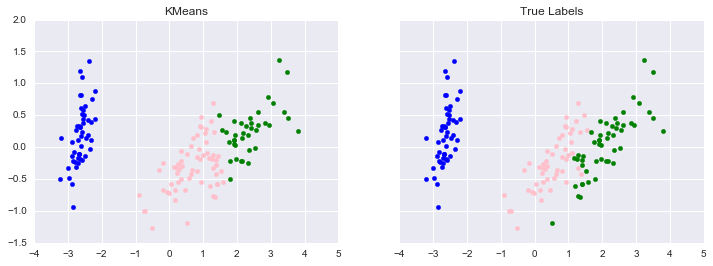

In [47]:
from sklearn.decomposition import PCA

pca = PCA(2)
X_pca = pca.fit_transform(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

f.set_figheight(4)
f.set_figwidth(12)

ax1.scatter(X_pca[labels==0][:, 0], X_pca[labels==0][:, 1], color='blue')
ax1.scatter(X_pca[labels==1][:, 0], X_pca[labels==1][:, 1], color='pink')
ax1.scatter(X_pca[labels==2][:, 0], X_pca[labels==2][:, 1], color='green')
ax1.set_title('KMeans')

ax2.scatter(X_pca[y==0][:, 0], X_pca[y==0][:, 1], color='blue')
ax2.scatter(X_pca[y==1][:, 0], X_pca[y==1][:, 1], color='pink')
ax2.scatter(X_pca[y==2][:, 0], X_pca[y==2][:, 1], color='green')
ax2.set_title('True Labels')